In [17]:
pip install elapid # Install the elapid library using pip [Series of Species Distribution Modeling Tools for python which includes Implementation of Maxent Model with biogeography data]

In [18]:
pip install geopandas # Install the geopandas library using pip [We can use it to work with geospatial data]

In [19]:
pip install rasterio # Install the rasterio library using pip [We can use it to read and manipulate raster datasets]

In [20]:
import matplotlib.pyplot as plt # For Data Visualization
import rasterio as rio # for Geospatial Raster Data
import geopandas as gpd # for Geospatial Data, specifically Vector Data
import pandas as pd  # For Data Manipulation and Analysis Tool
import elapid as ela  # Species Distribution Modeling Tools
import rasterio.plot as rioplot # To Visualize Raster Data
import warnings # To Ignore all the Warning Messages
import os # To Load the Datasets/Files from the Specified Directory
import re # For Patterns, i.e., used to match and manipulate strings
from sklearn import metrics # For Evaluation Metrics (To assess the performance)

In [21]:
# PLot Preferences
plt.style.use('ggplot')

# Ignore the Warning Messages
warnings.filterwarnings("ignore")

# Define the color for barplots
pair_colors = ['#FFCC02', '#00458C']


import warnings
import fiona

# Filter the specific Fiona warning messages you want to ignore
warnings.filterwarnings("ignore", category=fiona.errors.FionaDeprecationWarning)


# Your code here...


In [22]:
# Mount Google Drive in Google Colab

from google.colab import drive
drive.mount('/content/drive')

# After mounting Google Drive, we can access files and directories within it

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
bio_clim='/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_1981-2010/'

In [24]:
# background data or raster

#os path join to read background data
bioclimate_variables=[os.path.join(bio_clim,f) for f in os.listdir(bio_clim) if f.endswith(".tif")]
#bioclimate_variables

In [25]:
# Function to extract the Bioclimatic Variable Number from the path

def extract_number(path):
    # Extract the number using regular expression
    match = re.search(r'Bio_(\d+)', path)
    if match:
        return int(match.group(1))
    return 0

# Sort the paths based on the extracted number
sorted_paths = sorted(bioclimate_variables, key=extract_number)

# Print the sorted paths
for bioclimate_variables in sorted_paths:
    print(bioclimate_variables)

# Save the sorted paths in a list
bioclimate_variables = list(sorted_paths)

/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_1981-2010/cropped_Bio_1_Annual_mean_Temperature_Chelsa_1981-2010.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_1981-2010/cropped_Bio_2_Mean_Diurnal_Range_Chelsa_1981-2010.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_1981-2010/cropped_Bio_3_Isothermality_Chelsa_1981-2010.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_1981-2010/cropped_Bio_4_Temperature_Seasonality_Chelsa_1981-2010.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_1981-2010/cropped_Bio_5_Maximum_Temperature_of_Warmest_Month_Chelsa_1981-2010.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_1981-2010/cropped_Bio_6_Minimum_Temperature_of_Coldest_Month_Chelsa_1981-2010.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_1981-2010/cropped_Bio_7_Temperature_Annual_Range_C

In [26]:
# Add the Labels for Map
# Read the file path and split them, since we need only bioclim variables names

labels = []  # Initialize labels as an empty list
for i in bioclimate_variables:
    filename = os.path.basename(i)
    filename_without_extension = os.path.splitext(filename)[0]
    labels.append(filename_without_extension)
print(labels)

['cropped_Bio_1_Annual_mean_Temperature_Chelsa_1981-2010', 'cropped_Bio_2_Mean_Diurnal_Range_Chelsa_1981-2010', 'cropped_Bio_3_Isothermality_Chelsa_1981-2010', 'cropped_Bio_4_Temperature_Seasonality_Chelsa_1981-2010', 'cropped_Bio_5_Maximum_Temperature_of_Warmest_Month_Chelsa_1981-2010', 'cropped_Bio_6_Minimum_Temperature_of_Coldest_Month_Chelsa_1981-2010', 'cropped_Bio_7_Temperature_Annual_Range_Chelsa_1981-2010', 'cropped_Bio_8_Mean_Temperature_of_Wettest_Quarter_Chelsa_1981-2010', 'cropped_Bio_9_Mean_Temperature_of_Driest_Quarter_Chelsa_1981-2010', 'cropped_Bio_10_Mean_Temperature_of_Warmest_Quarter_Chelsa_1981-2010', 'cropped_Bio_11_Mean_Temperature_of_Coldest_Quarter_Chelsa_1981-2010', 'cropped_Bio_12_Annual_Precipitation_Chelsa', 'cropped_Bio_13_Precipitation_of_Wettest_Month_Chelsa_1981-2010', 'cropped_Bio_14_Precipitation_of_Driest_Month_Chelsa_1981-2010', 'cropped_Bio_15_Precipitation_of_Seasonality_Chelsa_1981-2010', 'cropped_Bio_16_Precipitation_of_Wettest_Quarter_Chelsa_198

In [27]:
# Reading Bug Data (Species Data), also called as Presence data in the Geopackage File Format

# read the presence data, draw background point samples
bug_Presence_data = gpd.read_file('/content/drive/MyDrive/Project_2/Insect Pest/Species Data/EDD Maps site/Halyomorpha_halys(1999_2023).gpkg')

In [28]:
# Convert the 'ObsDate' column to datetime format
bug_Presence_data['ObsDate'] = pd.to_datetime(bug_Presence_data['ObsDate'])

# Filter the data for the years 2011 to 2022
presence = bug_Presence_data[(bug_Presence_data['ObsDate'].dt.year >= 1999) & (bug_Presence_data['ObsDate'].dt.year <= 2010)]
presence.head()


,objectid,reporter,RecOwner,SciName,ComName,Nativity,OccStatus,Status,ObsDate,DateEnt,...,Reference,Locality,Comments,ReviewDate,Reviewer,VerifyMthd,Verified,IDCred,ReviewComm,geometry
1972,3049349,Rutgers Stink Bug Reports Rutgers,University,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,2010-12-31,07-24-13,...,NaN,NaN,NaN,NaN,NaN,NaN,Verified,Unconfirmed,NaN,POINT (-86.91391 40.39347)
1973,3049350,Rutgers Stink Bug Reports Rutgers,University,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,2010-12-31,07-24-13,...,NaN,NaN,NaN,NaN,NaN,NaN,Verified,Unconfirmed,NaN,POINT (-78.14250 39.30055)
1974,3049351,Rutgers Stink Bug Reports Rutgers,University,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,2010-12-31,07-24-13,...,NaN,NaN,NaN,NaN,NaN,NaN,Verified,Unconfirmed,NaN,POINT (-83.08296 40.26885)
1975,3049352,Rutgers Stink Bug Reports Rutgers,University,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,2010-12-31,07-24-13,...,NaN,NaN,NaN,NaN,NaN,NaN,Verified,Unconfirmed,NaN,POINT (-74.18713 40.84556)
1976,3049353,Rutgers Stink Bug Reports Rutgers,University,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,2010-12-30,07-24-13,...,NaN,NaN,NaN,NaN,NaN,NaN,Verified,Unconfirmed,NaN,POINT (-83.01361 40.01215)


# Bio_1_Annual_mean_Temperature_Chelsa_1981-2010

In [29]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[0], count=10_000)
background.head()

0    POINT (-120.89466 34.37289)
1    POINT (-115.13512 49.70489)
2     POINT (-98.98585 29.77785)
3     POINT (-74.79324 41.14114)
4     POINT (-88.62286 26.62781)
dtype: geometry

In [30]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [31]:
#Read raster values for each point in a vector and append as new column
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

,geometry,class,b01,b02,b03,b04,b05,b06,b07,b08,...,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19
0,POINT (-86.91391 40.39347),1,2845,95,2,9396,3017,2666,351,2942,...,2962,2718,9862,1190,490,271,3388,1649,3172,1649
1,POINT (-78.14250 39.30055),1,2855,99,2,8546,3028,2691,337,2943,...,2965,2743,10085,1008,642,144,2945,1996,2782,1996
2,POINT (-83.08296 40.26885),1,2842,94,2,9009,3012,2670,342,2935,...,2955,2722,10179,1140,564,209,3346,1985,3052,1990
3,POINT (-74.18713 40.84556),1,2849,83,2,8762,3016,2682,334,2954,...,2961,2735,13377,1278,860,104,3676,2861,3612,2861
4,POINT (-83.01361 40.01215),1,2847,95,2,9002,3017,2675,342,2940,...,2961,2727,9978,1154,584,204,3266,1993,2915,1993


In [32]:
# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [33]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [34]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model1c.ela')

Training AUC score: 0.984


In [35]:
# Write the model predictions to disk
output_raster1 = 'Annual_mean_Temperature_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster1, quiet=True)

# and read into memory
with rio.open(output_raster1, 'r') as src:
    pred = src.read(1, masked=True)

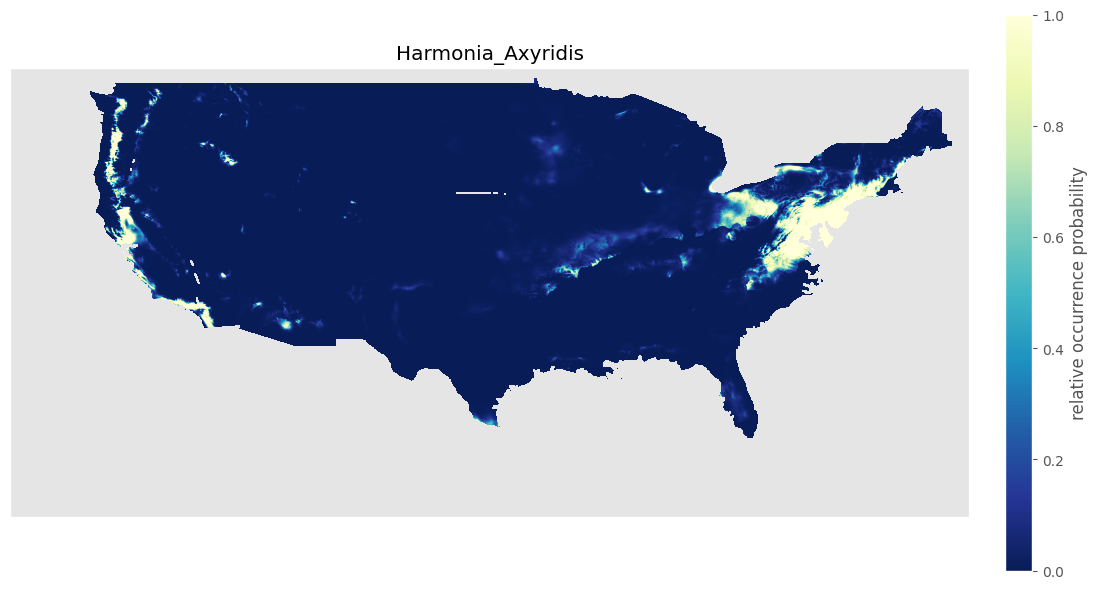

In [36]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot1 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar1 = plt.colorbar(plot1, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [37]:
# Save the colorbar as a TIFF file
colorbar_file1 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Annual_mean_Temperature_Chelsa_Prediction_1981-2010.tif'
cbar1.ax.figure.savefig(colorbar_file1, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_2_Mean_Diurnal_Range_Chelsa_1981-2010.tif

In [38]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[1], count=10_000)
background.head()

0     POINT (-93.19076 22.03530)
1     POINT (-85.63210 48.39331)
2    POINT (-103.22067 31.52898)
3     POINT (-66.89779 49.36766)
4     POINT (-83.79514 32.73858)
dtype: geometry

In [39]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [40]:
#Read raster values for each point in a vector and append as new column
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [41]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [42]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [43]:
# Save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model2c.ela')

# Write the model predictions to disk
output_raster2 = 'Mean_Diurnal_Range_Chelsa_Prediction_1981-2010.tif'

ela.apply_model_to_rasters(model, bioclimate_variables, output_raster2, quiet=True)

In [44]:
# Read into memory
with rio.open(output_raster2, 'r') as src:
    pred = src.read(1, masked=True)

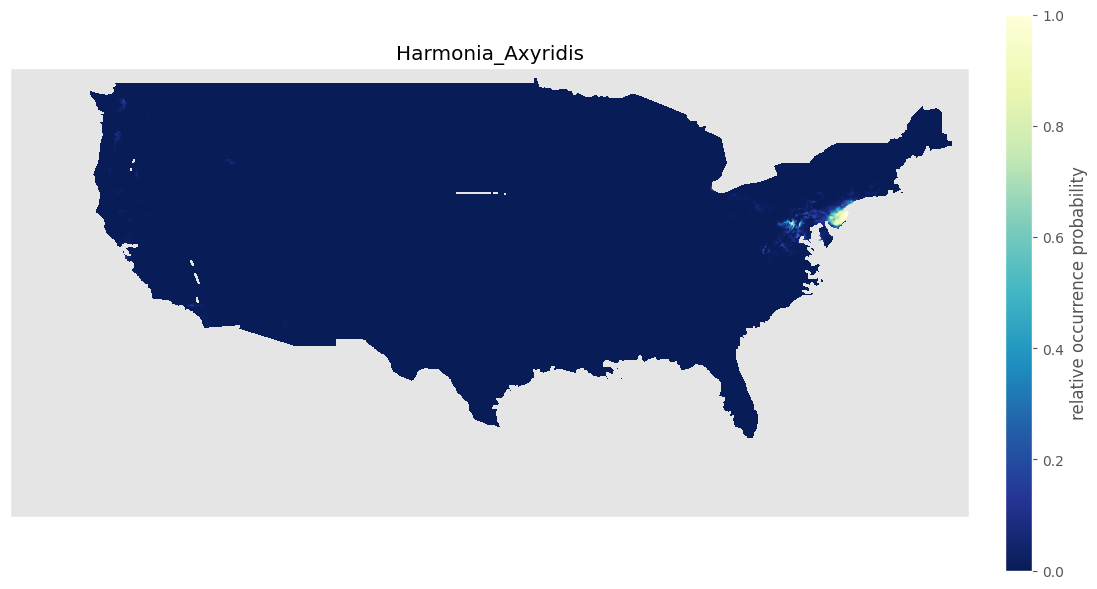

In [45]:
# Plot the Suitability Predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot2 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar2 = plt.colorbar(plot2, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [46]:
# Save the colorbar as a TIFF file
colorbar_file2 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Mean_Diurnal_Range_Chelsa_1981-2010.tif'
cbar2.ax.figure.savefig(colorbar_file2, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_3_Isothermality_Chelsa_1981-2010.tif

In [47]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[2], count=10_000)
background.head()

0     POINT (-66.25417 44.07917)
1     POINT (-80.99583 48.68750)
2    POINT (-114.47083 39.63750)
3    POINT (-117.45417 29.42917)
4    POINT (-114.10417 48.02917)
dtype: geometry

In [48]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [49]:
#Read raster values for each point in a vector and append as new column
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [50]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [51]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.986


In [52]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model3c.ela')

# Write the model predictions to disk
output_raster3 = 'Isothermality_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster3, quiet=True)

In [53]:
# Read into memory
with rio.open(output_raster3, 'r') as src:
    pred = src.read(1, masked=True)

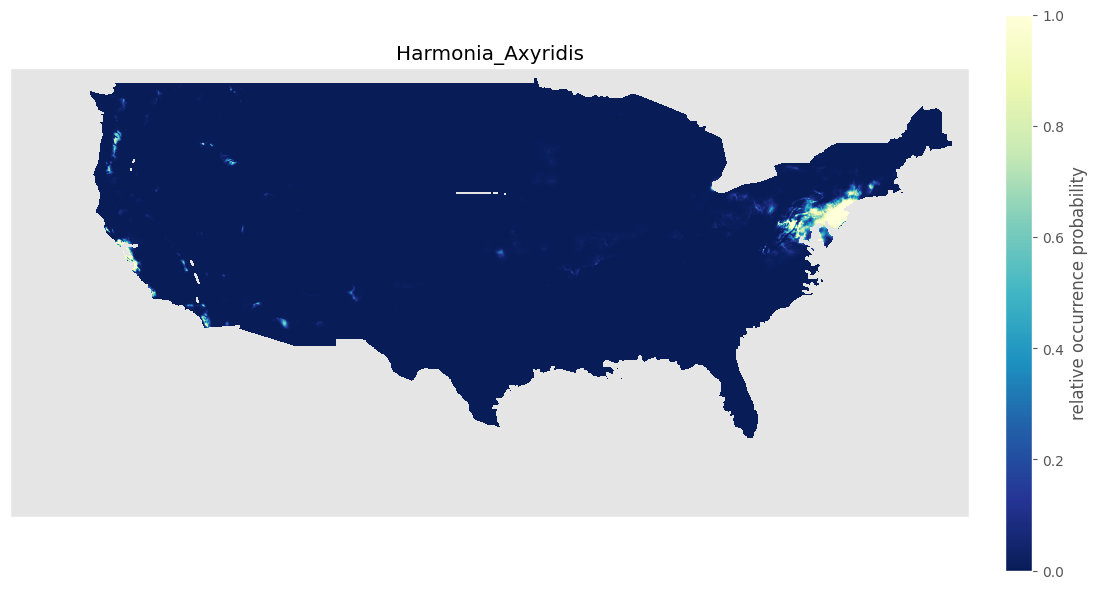

In [54]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot3 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar3 = plt.colorbar(plot3, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [55]:
# Save the colorbar as a TIFF file
colorbar_file3 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Isothermality_Chelsa_Prediction_1981-2010.tif'
cbar3.ax.figure.savefig(colorbar_file3, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_4_Temperature_Seasonality_Chelsa_1981-2010.tif

In [56]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[3], count=10_000)
background.head()

0    POINT (-113.60346 28.32430)
1    POINT (-111.68605 39.42378)
2     POINT (-85.74200 25.98225)
3     POINT (-82.99467 35.77000)
4    POINT (-100.56719 22.24920)
dtype: geometry

In [57]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [58]:
#Read raster values for each point in a vector and append as new column
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [59]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [60]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [61]:
# Save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model4c.ela')

# Write the model predictions to disk
output_raster4 = 'Temperature_Seasonality_Chelsa_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster4, quiet=True)

In [62]:
# Read into memory
with rio.open(output_raster4, 'r') as src:
    pred = src.read(1, masked=True)


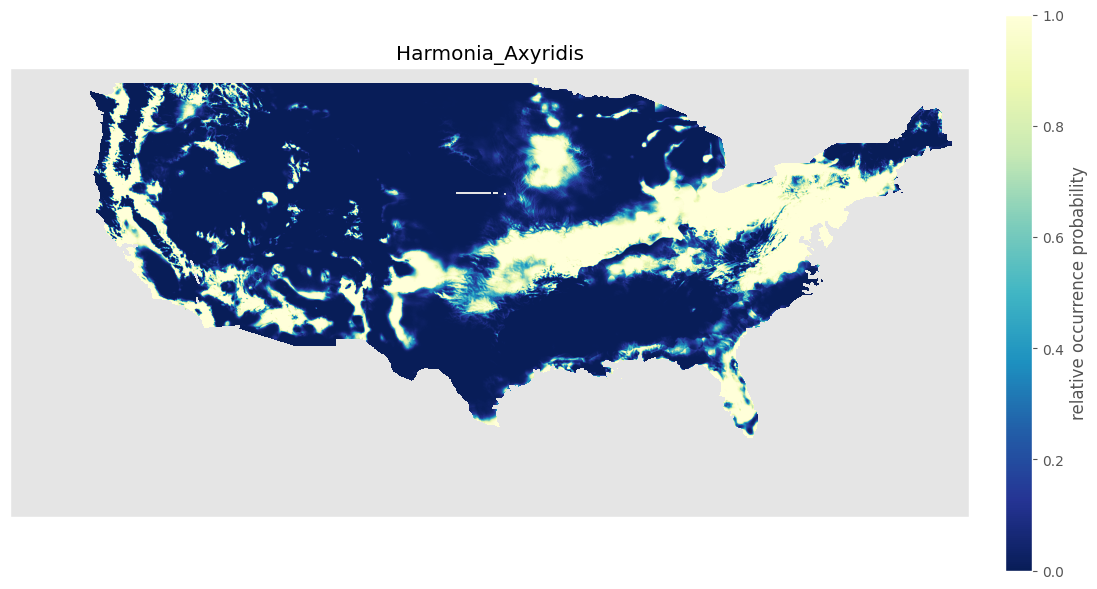

In [63]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot4 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar4 = plt.colorbar(plot4, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [64]:
# Save the colorbar as a TIFF file
colorbar_file4 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Temperature_Seasonality_Chelsa_1981-2010.tif'
cbar4.ax.figure.savefig(colorbar_file4, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_5_Maximum_Temperature_of_Warmest_Month_Chelsa_1981-2010.tif

In [65]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[4], count=10_000)
background.head()

0    POINT (-113.34181 40.89005)
1    POINT (-127.66265 46.59920)
2     POINT (-75.30953 41.02787)
3    POINT (-101.21736 49.98911)
4     POINT (-99.94573 37.15257)
dtype: geometry

In [66]:
# Merge Datasets and Read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [67]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [68]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [69]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [70]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model5c.ela')

#Write the model predictions to disk
output_raster5 = 'Maximum_Temperature_of_Warmest_Month_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster5, quiet=True)

In [71]:
# Read into memory
with rio.open(output_raster5, 'r') as src:
    pred = src.read(1, masked=True)


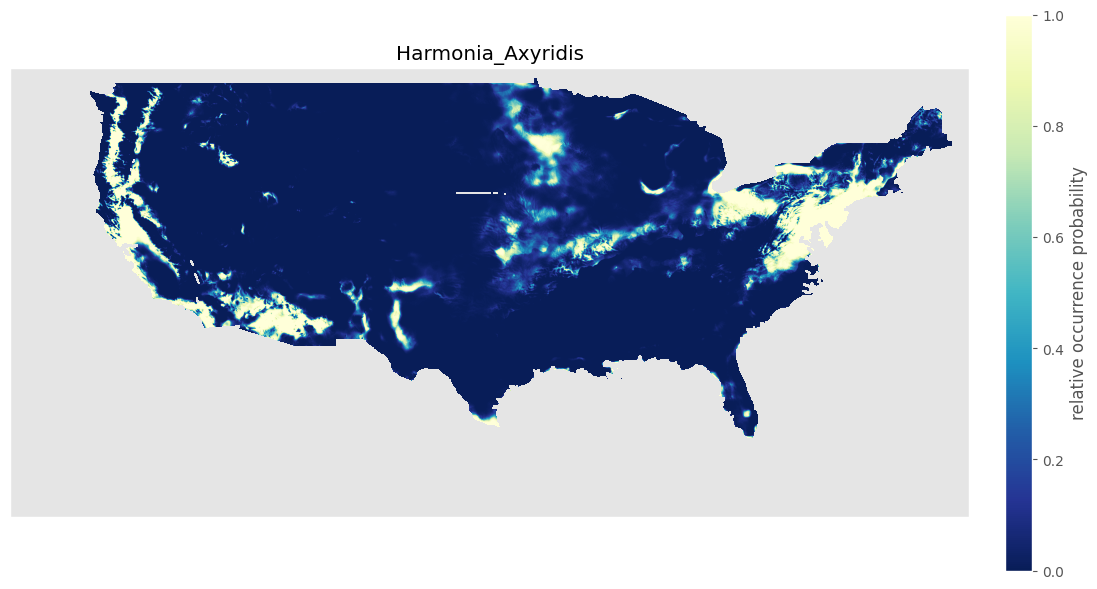

In [72]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot5 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar5 = plt.colorbar(plot5, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [73]:
# Save the colorbar as a TIFF file
colorbar_file5 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Maximum_Temperature_of_Warmest_Month_Chelsa_Prediction_1981-2010.tif'
cbar5.ax.figure.savefig(colorbar_file5, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_6_Minimum_Temperature_of_Coldest_Month_Chelsa_1981-2010.tif


In [74]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[5], count=10_000)
background.head()

0    POINT (-115.37953 22.19155)
1    POINT (-112.50320 31.96305)
2     POINT (-73.05524 37.07502)
3    POINT (-125.90729 49.00695)
4    POINT (-102.77328 42.54540)
dtype: geometry

In [75]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [76]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [77]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [78]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.984


In [79]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model6c.ela')

# Write the model predictions to disk
output_raster6 = 'Minimum_Temperature_of_Coldest_Month_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster6, quiet=True)

In [80]:
# Read into memory
with rio.open(output_raster6, 'r') as src:
    pred = src.read(1, masked=True)


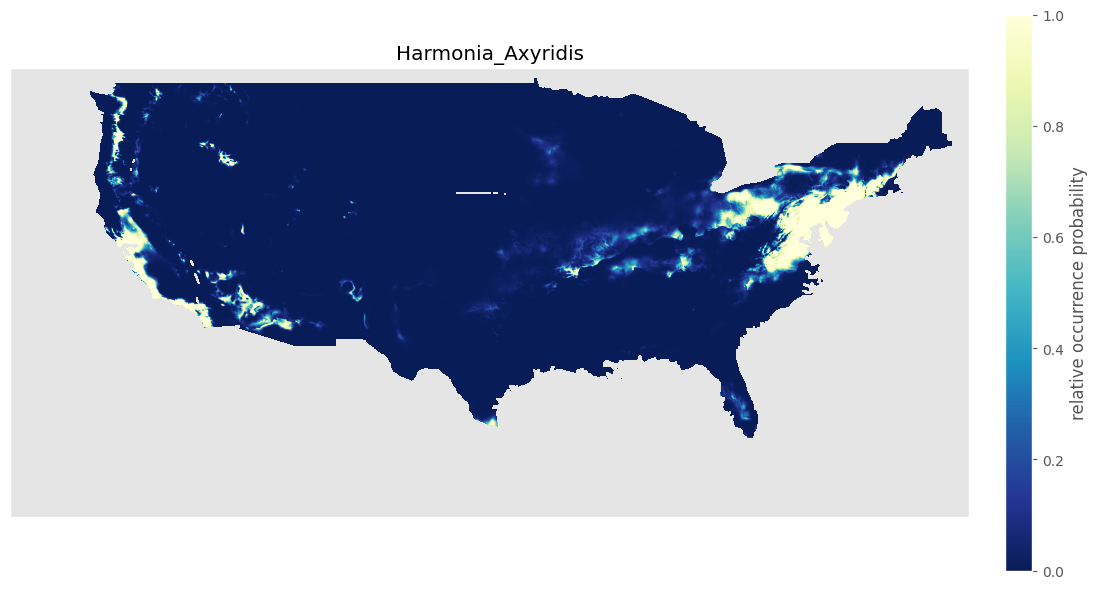

In [81]:
 # Plot the Suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot6 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar6 = plt.colorbar(plot6, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [82]:
# Save the colorbar as a TIFF file
colorbar_file6 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Minimum_Temperature_of_Coldest_Month_Chelsa_Prediction_1981-2010.tif'
cbar6.ax.figure.savefig(colorbar_file6, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_7_Temperature_Annual_Range_Chelsa_1981-2010

In [83]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[6], count=10_000)
background.head()

0     POINT (-97.45976 27.59511)
1     POINT (-96.10533 41.00920)
2    POINT (-113.64278 43.19659)
3     POINT (-84.51052 27.30707)
4     POINT (-68.45874 24.66913)
dtype: geometry

In [84]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [85]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [86]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [87]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.986


In [88]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model7c.ela')

# Write the model predictions to disk
output_raster7 = 'Temperature_Annual_Range_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster7, quiet=True)

In [89]:
# Read into memory
with rio.open(output_raster7, 'r') as src:
    pred = src.read(1, masked=True)


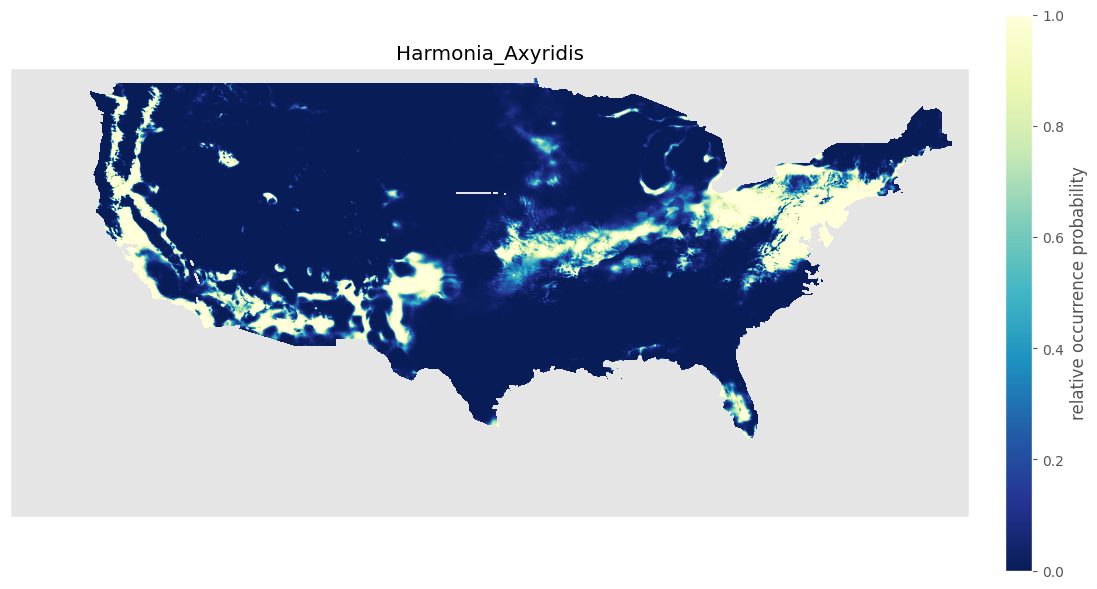

In [90]:

# Plot the Suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot7 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar7 = plt.colorbar(plot7, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [91]:
# Save the colorbar as a TIFF file
colorbar_file7 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Temperature_Annual_Range_Chelsa_Prediction_1981-2010.tif'
cbar7.ax.figure.savefig(colorbar_file7, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_8_Mean_Temperature_of_Wettest_Quarter_Chelsa_1981-2010.tif

In [92]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[7], count=10_000)
background.head()

0    POINT (-115.32917 36.82083)
1    POINT (-105.07917 26.41250)
2    POINT (-111.27917 24.45417)
3     POINT (-86.84583 20.98750)
4    POINT (-121.52083 40.77083)
dtype: geometry

In [93]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [94]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [95]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [96]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.984


In [97]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model8c.ela')

# Write the model predictions to disk
output_raster8 = 'Mean_Temperature_of_Wettest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster8, quiet=True)

In [98]:
# Read into memory
with rio.open(output_raster8, 'r') as src:
    pred = src.read(1, masked=True)


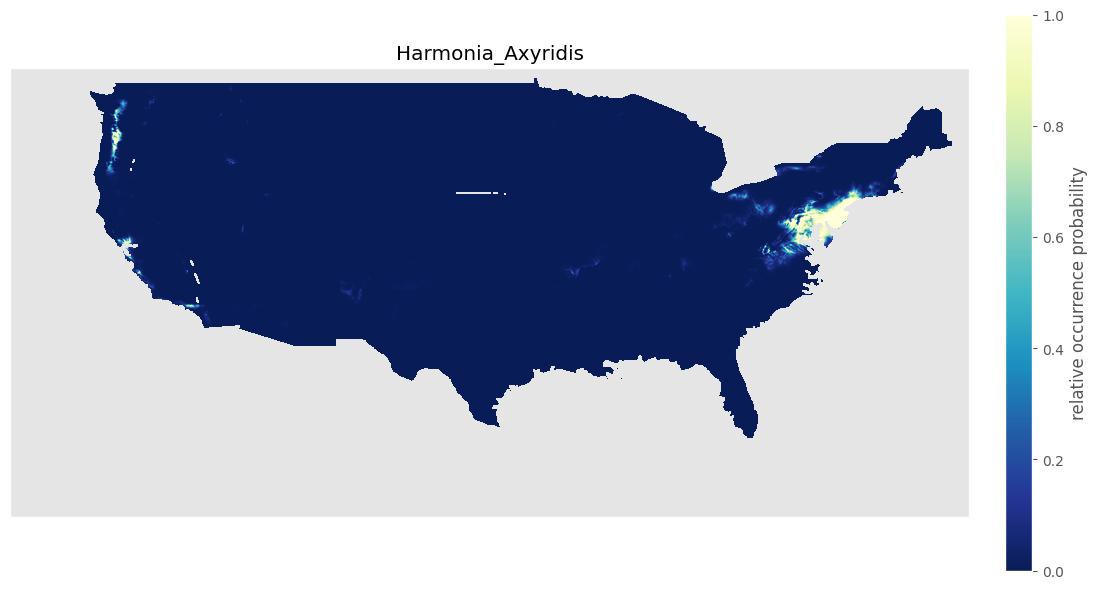

In [99]:
   # Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot8 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar8 = plt.colorbar(plot8, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [100]:
# Save the colorbar as a TIFF file
colorbar_file = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Mean_Temperature_of_Wettest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar8.ax.figure.savefig(colorbar_file, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_9_Mean_Temperature_of_Driest_Quarter_Chelsa_1981-2010.tif

In [101]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[8], count=10_000)
background.head()

0    POINT (-116.33750 44.36250)
1     POINT (-89.30417 22.76250)
2    POINT (-121.37083 31.77083)
3     POINT (-71.84583 48.67917)
4     POINT (-93.62083 36.31250)
dtype: geometry

In [102]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [103]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [104]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [105]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.984


In [106]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model9c.ela')

# Write the model predictions to disk
output_raster9 = 'Mean_Temperature_of_Driest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster9, quiet=True)

# Read into memory
with rio.open(output_raster9, 'r') as src:
    pred = src.read(1, masked=True)


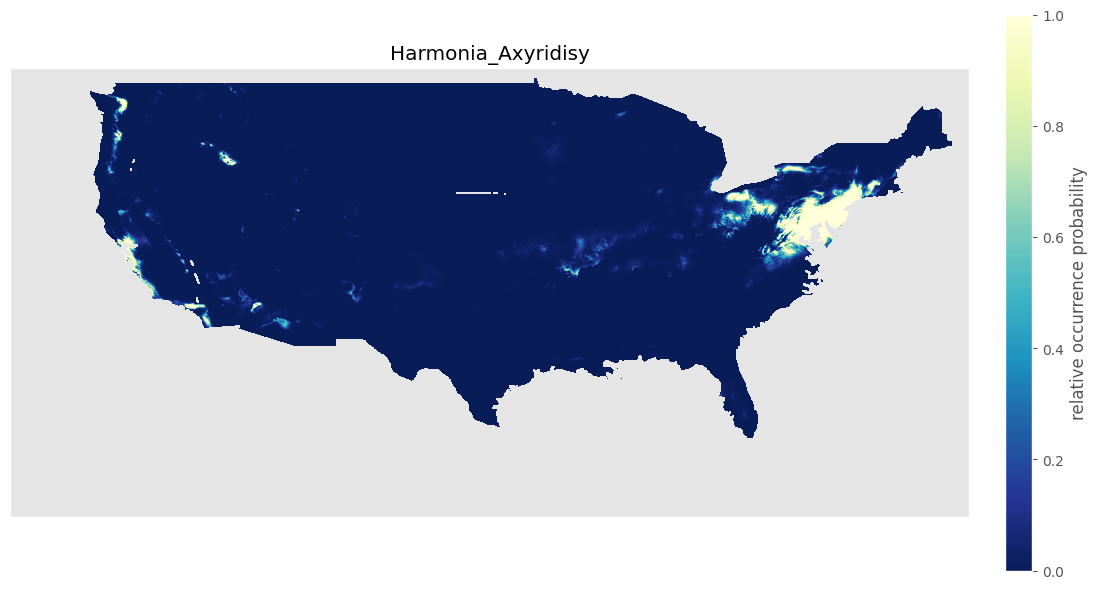

In [107]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot9 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridisy')
ax.set_xticks([])
ax.set_yticks([])
cbar9 = plt.colorbar(plot9, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [108]:
# Save the colorbar as a TIFF file
colorbar_file9 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Mean_Temperature_of_Driest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar9.ax.figure.savefig(colorbar_file9, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_10_Mean_Temperature_of_Warmest_Quarter_Chelsa_1981-2010.tif

In [109]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[9], count=10_000)
background.head()

0     POINT (-66.77917 36.02083)
1    POINT (-102.07917 25.28750)
2     POINT (-83.28750 44.14583)
3     POINT (-79.32083 23.62083)
4    POINT (-118.45417 35.84583)
dtype: geometry

In [110]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [111]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [112]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [113]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [114]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model10c.ela')

# Write the model predictions to disk
output_raster10 = 'Mean_Temperature_of_Warmest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster10, quiet=True)

# Read into memory
with rio.open(output_raster10, 'r') as src:
    pred = src.read(1, masked=True)


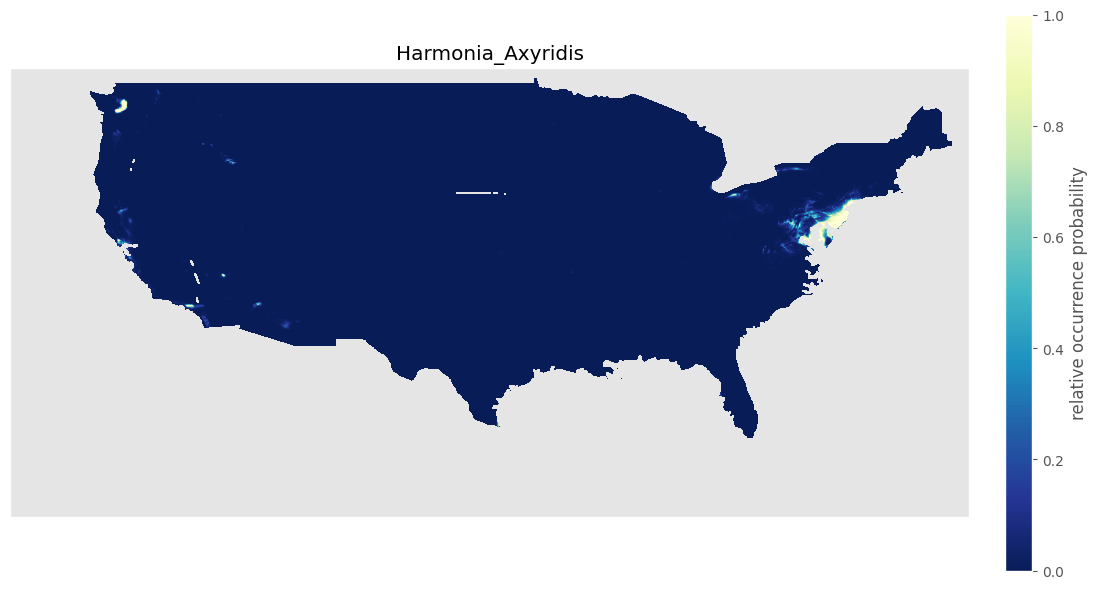

In [115]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot10 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar10 = plt.colorbar(plot10, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [116]:
# Save the colorbar as a TIFF file
colorbar_file10 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Mean_Temperature_of_Warmest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar10.ax.figure.savefig(colorbar_file10, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_11_Mean_Temperature_of_Coldest_Quarter_Chelsa_1981-2010.tif

In [117]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[10], count=10_000)
background.head()

0    POINT (-120.29583 45.68750)
1    POINT (-102.41250 22.72083)
2    POINT (-110.52917 31.07917)
3     POINT (-77.90417 40.34583)
4     POINT (-74.74583 47.82917)
dtype: geometry

In [118]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [119]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [120]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [121]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.984


In [122]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model11c.ela')

# Write the model predictions to disk
output_raster11 = 'Mean_Temperature_of_Coldest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster11, quiet=True)

# Read into memory
with rio.open(output_raster11, 'r') as src:
    pred = src.read(1, masked=True)

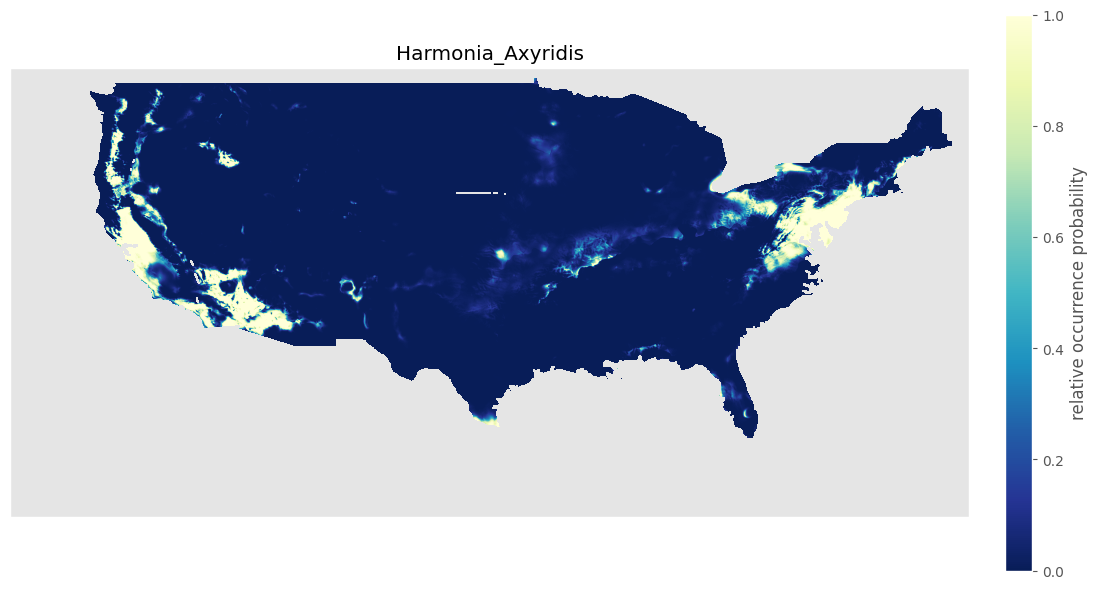

In [123]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot11 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar11 = plt.colorbar(plot11, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [124]:
# Save the colorbar as a TIFF file
colorbar_file11 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Mean_Temperature_of_Coldest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar11.ax.figure.savefig(colorbar_file11, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_12_Annual_Precipitation_Chelsa_1981-2010.tif

In [125]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[11], count=10_000)
background.head()

0    POINT (-100.49727 21.95744)
1    POINT (-101.19808 34.34880)
2    POINT (-114.93003 22.66787)
3    POINT (-109.37340 35.75864)
4     POINT (-69.84206 39.71316)
dtype: geometry

In [126]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [127]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [128]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [129]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [130]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model10c.ela')

# Write the model predictions to disk
output_raster12 = 'Annual_Precipitation_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster12, quiet=True)

# Read into memory
with rio.open(output_raster12, 'r') as src:
    pred = src.read(1, masked=True)


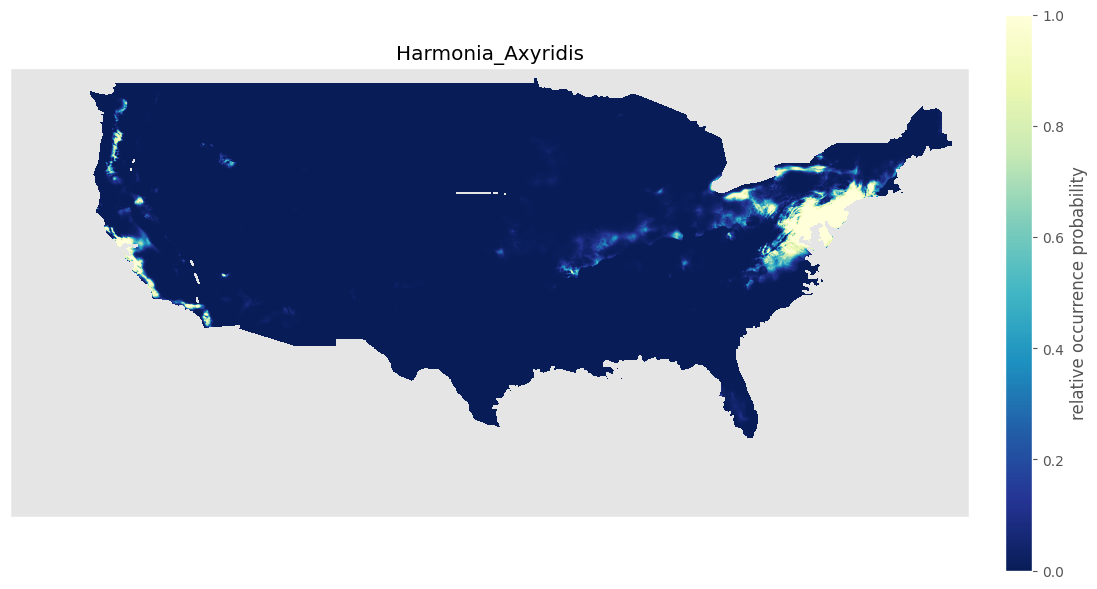

In [131]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot12 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar12 = plt.colorbar(plot12, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [132]:
# Save the colorbar as a TIFF file
colorbar_file12 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Annual_Precipitation_Chelsa_Prediction_1981-2010.tif'
cbar12.ax.figure.savefig(colorbar_file12, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_13_Precipitation_of_Wettest_Month_Chelsa_1981-2010.tif

In [133]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[12], count=10_000)
background.head()

0    POINT (-100.95147 31.81490)
1    POINT (-103.64026 28.86327)
2    POINT (-103.24448 41.04549)
3    POINT (-119.42159 43.37782)
4     POINT (-95.92753 20.08945)
dtype: geometry

In [134]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [135]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [136]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [137]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.986


In [138]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model13c.ela')

# Write the model predictions to disk
output_raster13 = 'Precipitation_of_Wettest_Month_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster13, quiet=True)

# Read into memory
with rio.open(output_raster13, 'r') as src:
    pred = src.read(1, masked=True)


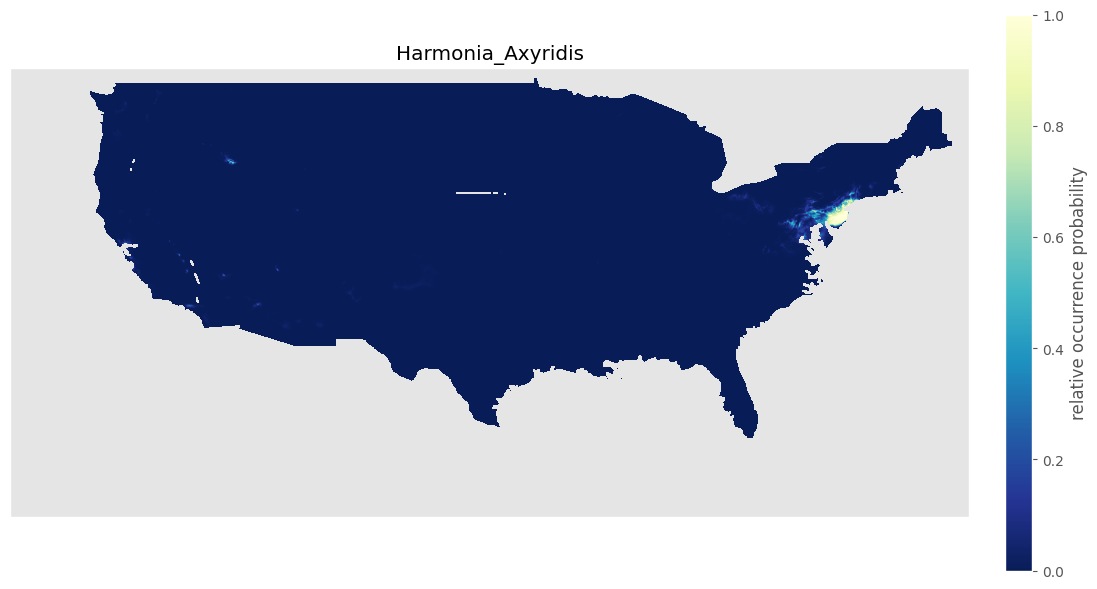

In [139]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot13 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar13 = plt.colorbar(plot13, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [140]:
# Save the colorbar as a TIFF file
colorbar_file13 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Precipitation_of_Wettest_Month_Chelsa_Prediction_1981-2010.tif'
cbar13.ax.figure.savefig(colorbar_file13, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_14_Precipitation_of_Driest_Month_Chelsa_1981-2010.tif

In [141]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[13], count=10_000)
background.head()

0    POINT (-102.54159 25.16832)
1    POINT (-116.77475 38.63733)
2     POINT (-89.03116 26.92880)
3    POINT (-111.50973 47.49604)
4     POINT (-66.73591 49.08931)
dtype: geometry

In [142]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [143]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [144]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [145]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [146]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model14c.ela')

# Write the model predictions to disk
output_raster14 = 'Precipitation_of_Driest_Month_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster14, quiet=True)

# Read into memory
with rio.open(output_raster14, 'r') as src:
    pred = src.read(1, masked=True)


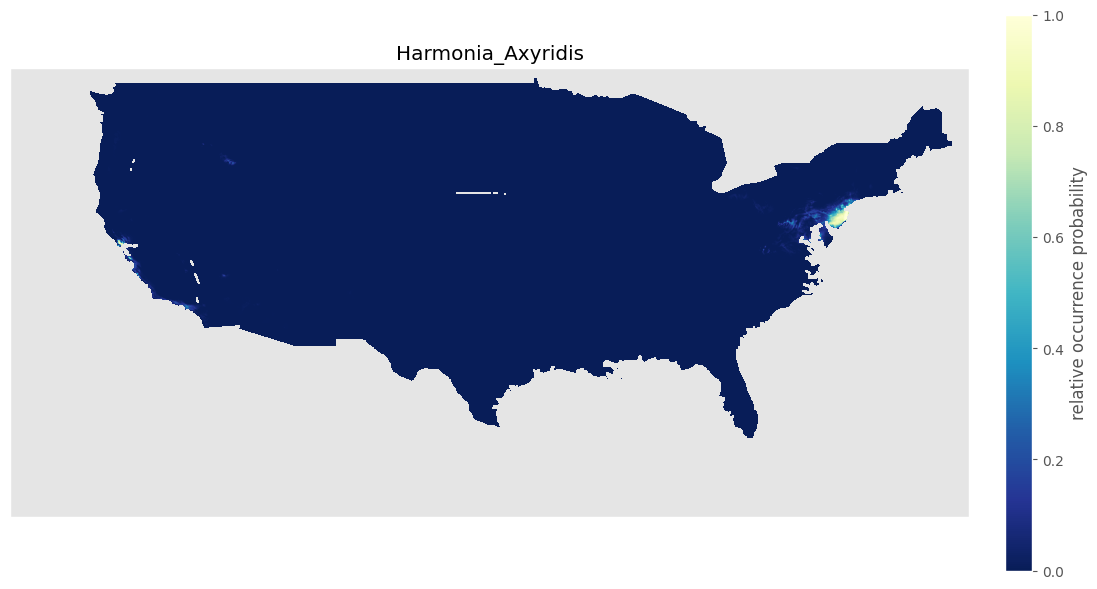

In [147]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot14 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar14 = plt.colorbar(plot14, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [148]:
# Save the colorbar as a TIFF file
colorbar_file14 = '//content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Precipitation_of_Driest_Month_Chelsa_Prediction_1981-2010.tif'
cbar14.ax.figure.savefig(colorbar_file14, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_15_Precipitation_of_Seasonality_Chelsa_1981-2010.tif

In [149]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[14], count=10_000)
background.head()

0    POINT (-121.32406 35.97542)
1    POINT (-100.94329 30.14074)
2     POINT (-66.68033 33.33403)
3    POINT (-106.37857 38.29973)
4     POINT (-86.45045 27.33703)
dtype: geometry

In [150]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [151]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [152]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [153]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.986


In [154]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model15c.ela')

# write the model predictions to disk
output_raster15 = 'Precipitation_of_Seasonality_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster15, quiet=True)

# Read into memory
with rio.open(output_raster15, 'r') as src:
    pred = src.read(1, masked=True)


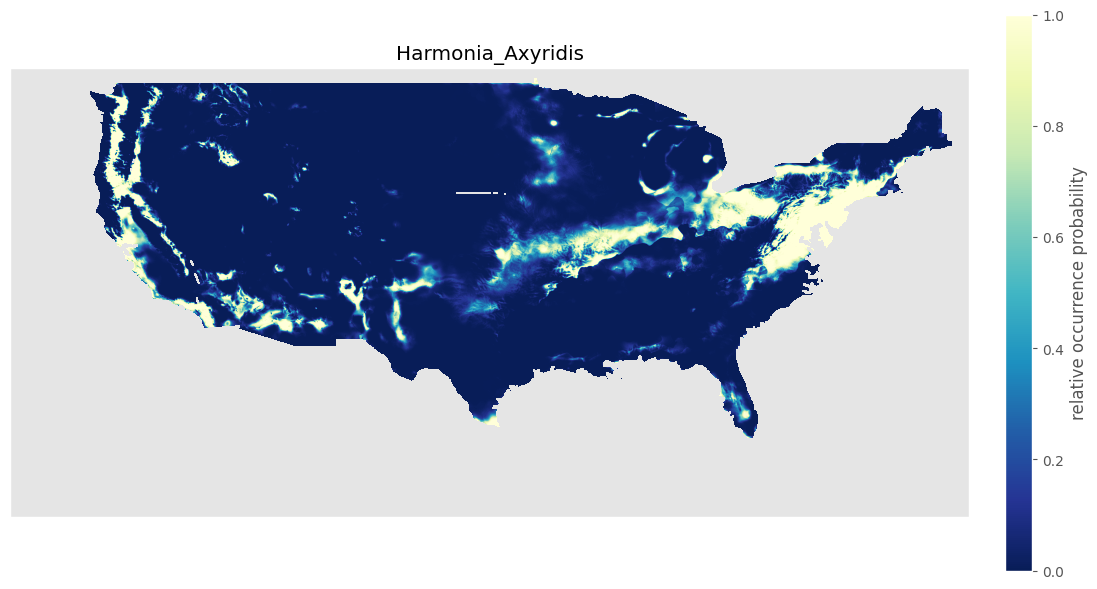

In [155]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot15 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar15 = plt.colorbar(plot15, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [156]:
# Save the colorbar as a TIFF file
colorbar_file15 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Precipitation_of_Seasonality_Chelsa_Prediction_1981-2010.tif'
cbar15.ax.figure.savefig(colorbar_file15, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_16_Precipitation_of_Wettest_Quarter_Chelsa_1981-2010.tif

In [157]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[15], count=10_000)
background.head()

0     POINT (-93.08750 39.33750)
1    POINT (-127.84583 24.47917)
2     POINT (-91.46250 48.97917)
3     POINT (-75.86250 47.52083)
4     POINT (-79.45417 35.18750)
dtype: geometry

In [158]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [159]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [160]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [161]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.984


In [162]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model16c.ela')

# Write the model predictions to disk
output_raster16 = 'Precipitation_of_Wettest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster16, quiet=True)

# Read into memory
with rio.open(output_raster16, 'r') as src:
    pred = src.read(1, masked=True)


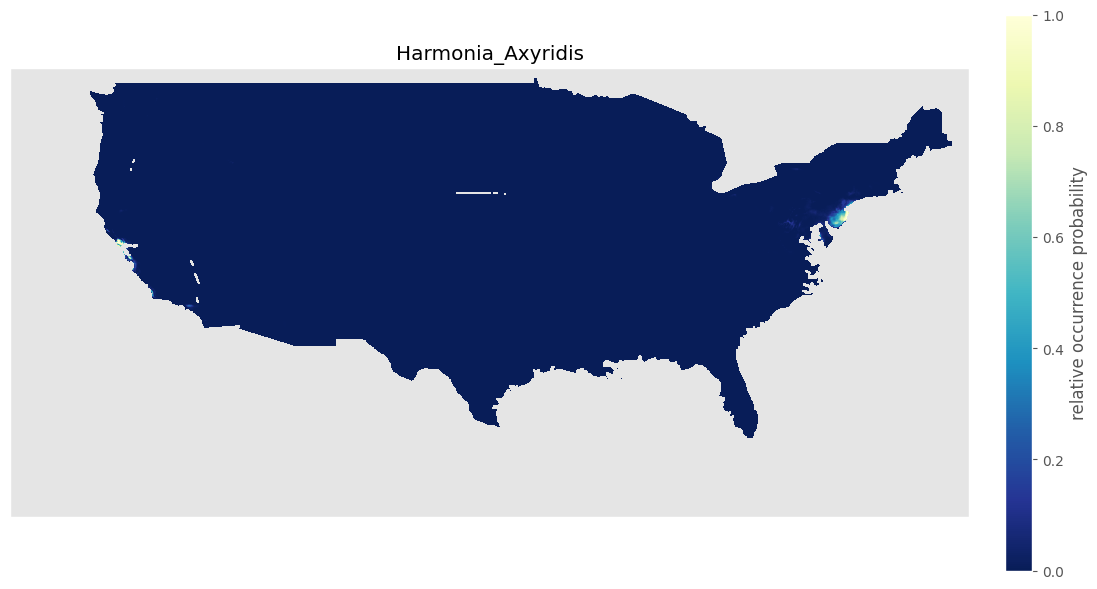

In [163]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot16 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar16 = plt.colorbar(plot16, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [164]:
# Save the colorbar as a TIFF file
colorbar_file16 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Precipitation_of_Wettest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar16.ax.figure.savefig(colorbar_file16, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_17_Precipitation_of_Driest_Quarter_Chelsa_1981-2010.tif

In [165]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[16], count=10_000)
background.head()

0    POINT (-78.19583 29.23750)
1    POINT (-98.37917 20.86250)
2    POINT (-66.35417 43.24583)
3    POINT (-72.60417 20.68750)
4    POINT (-97.87917 45.82083)
dtype: geometry

In [166]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [167]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [168]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [169]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [170]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model17c.ela')

# Write the model predictions to disk
output_raster17 = 'Precipitation_of_Driest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster17, quiet=True)

# Read into memory
with rio.open(output_raster17, 'r') as src:
    pred = src.read(1, masked=True)


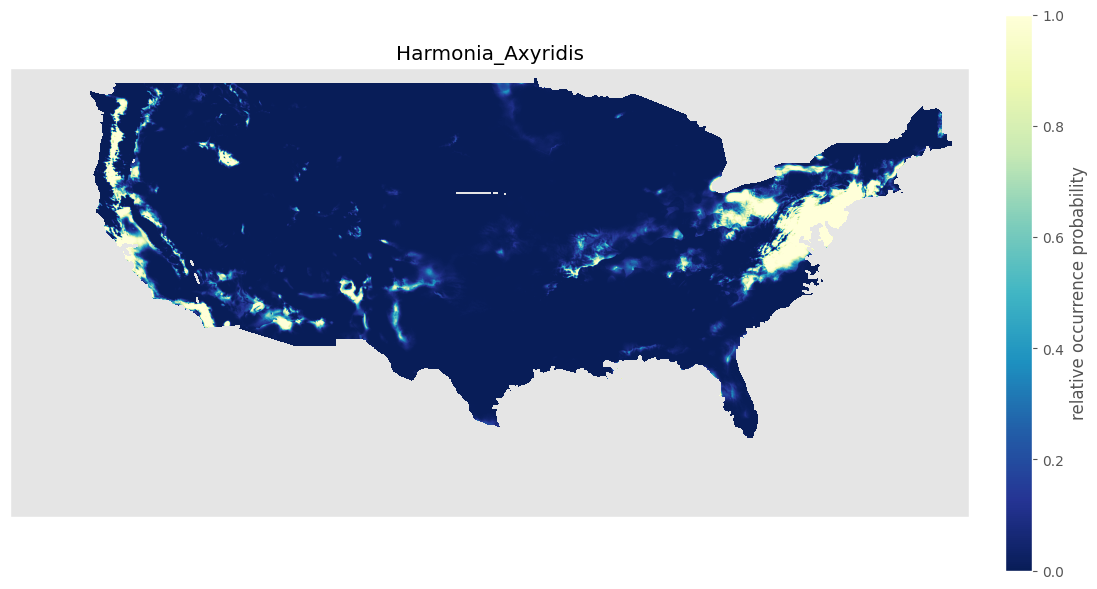

In [171]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot17 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar17 = plt.colorbar(plot17, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [172]:
# Save the colorbar as a TIFF file
colorbar_file17 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Precipitation_of_Driest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar17.ax.figure.savefig(colorbar_file17, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_18_Precipitation_of_Warmest_Quarter_Chelsa_1981-2010.tif

In [173]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[17], count=10_000)
background.head()

0    POINT (-107.55417 29.17083)
1     POINT (-98.85417 42.73750)
2     POINT (-72.72917 31.16250)
3    POINT (-119.10417 26.87917)
4    POINT (-100.72917 28.48750)
dtype: geometry

In [174]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [175]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [176]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [177]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [178]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model18c.ela')

# Write the model predictions to disk
output_raster18 = 'Precipitation_of_Warmest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster18, quiet=True)

# Read into memory
with rio.open(output_raster18, 'r') as src:
    pred = src.read(1, masked=True)


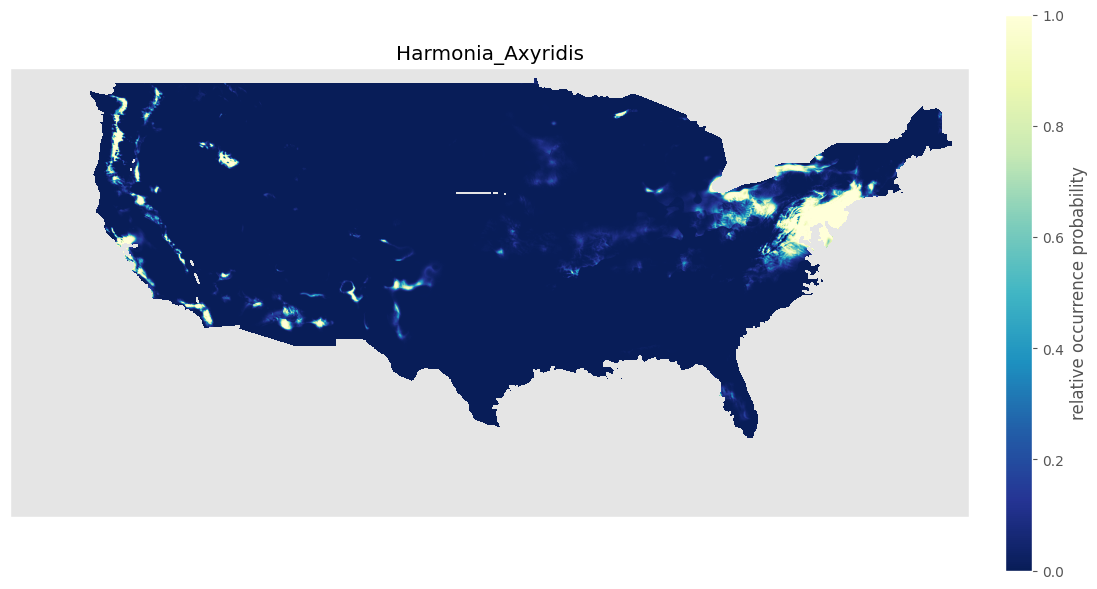

In [179]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot18 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar18 = plt.colorbar(plot18, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [180]:
# Save the colorbar as a TIFF file
colorbar_file18 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Precipitation_of_Warmest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar18.ax.figure.savefig(colorbar_file18, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_19_Precipitation_of_Coldest_Quarter_Chelsa_1981-2010.tif

In [181]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[18], count=10_000)
background.head()

0    POINT (-100.22083 44.57083)
1    POINT (-108.97083 38.31250)
2     POINT (-96.50417 20.99583)
3    POINT (-103.28750 45.80417)
4    POINT (-102.40417 22.79583)
dtype: geometry

In [182]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [183]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [184]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [185]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [186]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model19c.ela')

# Write the model predictions to disk
output_raster19 = 'Precipitation_of_Coldest_Quarter_Chelsa_Prediction_1981-2010.tif'

#Applies a trained model to a list of raster datasets
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster19, quiet=True)

# Read into memory
with rio.open(output_raster19, 'r') as src:
    pred = src.read(1, masked=True)


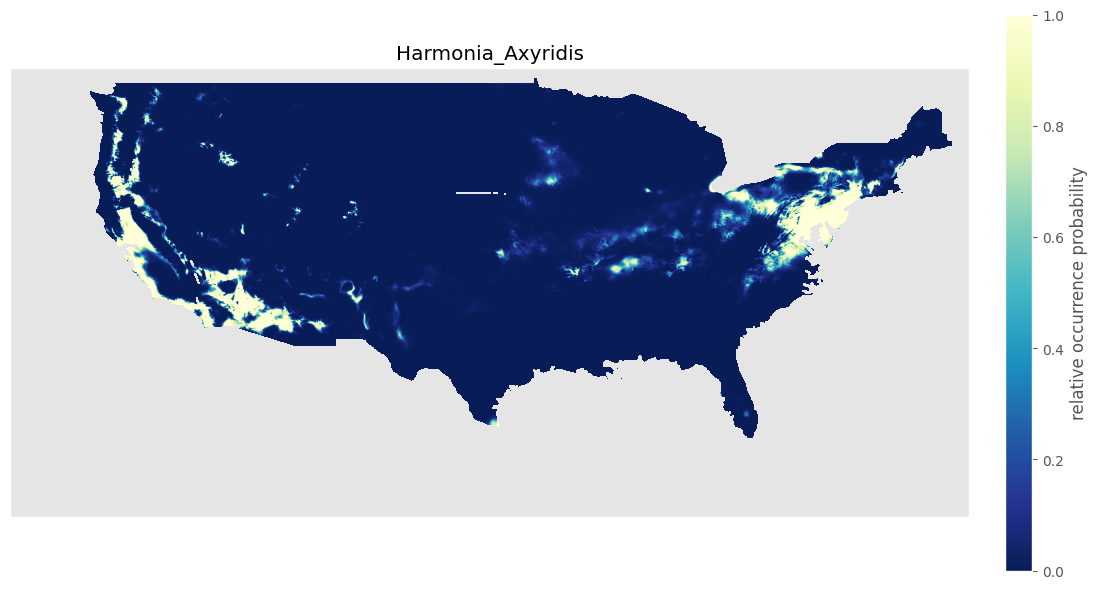

In [187]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot19 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar19 = plt.colorbar(plot19, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [188]:
# Save the colorbar as a TIFF file
colorbar_file19 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Harmonia/Precipitation_of_Coldest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar19.ax.figure.savefig(colorbar_file19, format='tiff')

# Close the figure to free up memory
plt.close(fig)